In [2]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

import numpy as np
import matplotlib.pyplot as plt

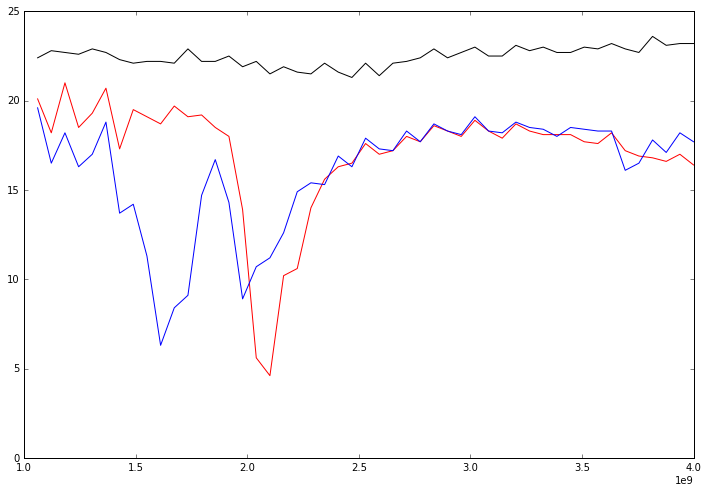

In [23]:
bare = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\12-1-16\amp  MW power sweep')
cpw = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\12-1-16\MNP 8-4 on CPW  MW power sweep')
ndcpw = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\12-2-16\bare ND on CPW -9dbm mw transmission')
plt.plot(bare[:,1],bare[:,2]+24,'k-')
plt.plot(cpw[:,1],cpw[:,2]+24,'r-')
plt.plot(ndcpw[:,1],ndcpw[:,2]+24,'b-')

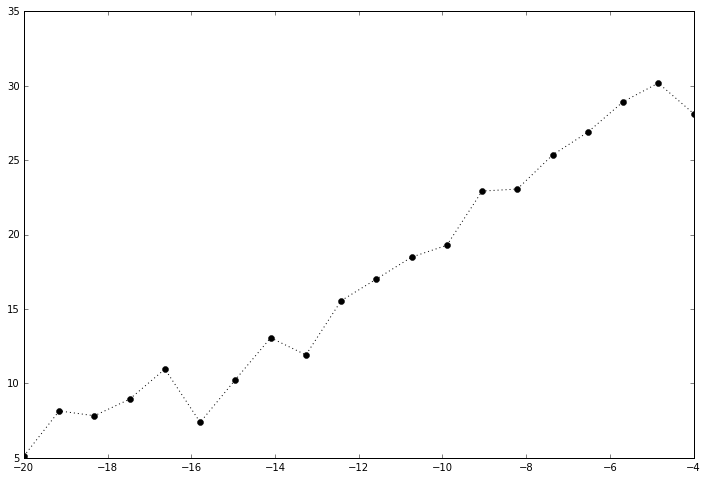

In [25]:
mwcontrast = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\12-2-16\bare ND on CPW 5mW 600LP scan 1 x77 y78 MW contrast power sweep')
plt.plot(mwcontrast[:,0],mwcontrast[:,1],'ko:')

(0, 1.2)

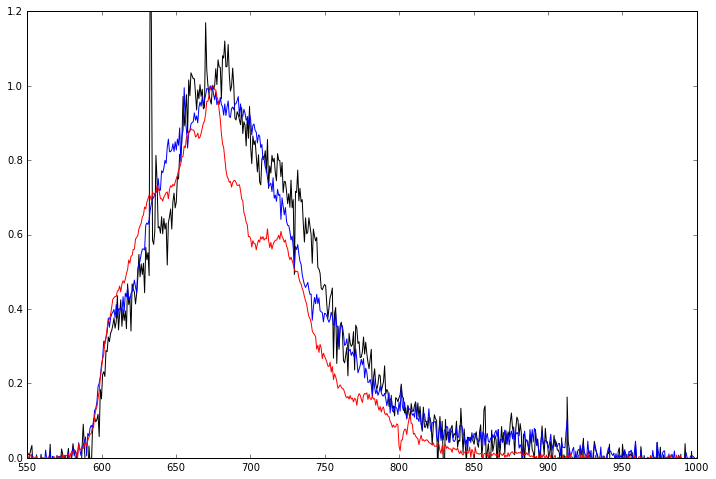

In [37]:
D1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\12-2-16\8-4 MNP 5mW 600LP dot 1 scan 2.txt')
bare = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data for NC review\ND W1 PMMA Dot 1.txt')
nd = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\12-2-16\bare ND 5mW 600LP dot 2 scan 2.txt')

plt.plot(nd[:,0],nd[:,1]/nd[nd[:,0]==675.98][:,1],'k-')
plt.plot(D1[:,0],D1[:,1]/np.max(D1[:,1]),'b-')
plt.plot(bare[:,0],bare[:,1]/np.max(bare[:,1]),'r-')

plt.xlim([550,1000])
plt.ylim([0,1.2])

(0, 1.2)

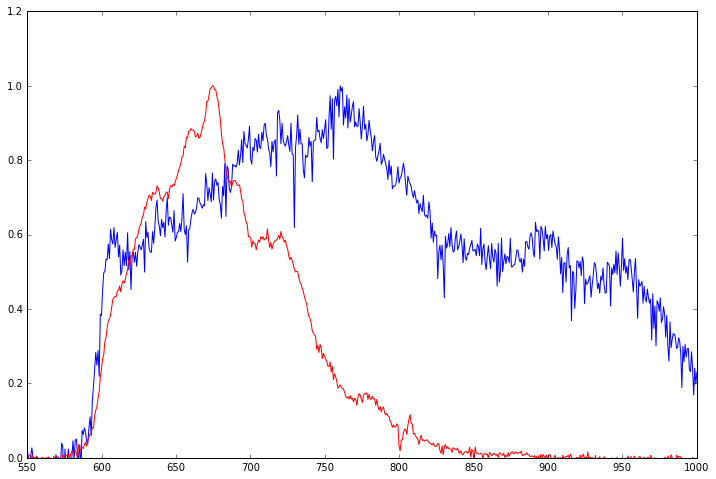

In [21]:
D1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\12-2-16\8-4 MNP 5mW 600LP dot 5.txt')
bare = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data for NC review\ND W1 PMMA Dot 1.txt')

plt.plot(D1[:,0],D1[:,1]/np.max(D1[:,1]))
plt.plot(bare[:,0],bare[:,1]/np.max(bare[:,1]),'r-')

plt.xlim([550,1000])
plt.ylim([0,1.2])

In [4]:
ab = np.loadtxt(r'c:\users\ouyang group\documents\data\12-2-16\mnp 8-4 on cpw 1 mw 650lp scan 7 spcx=112 y=88 2 minute interval 3 hours.txt',
               skiprows=12)

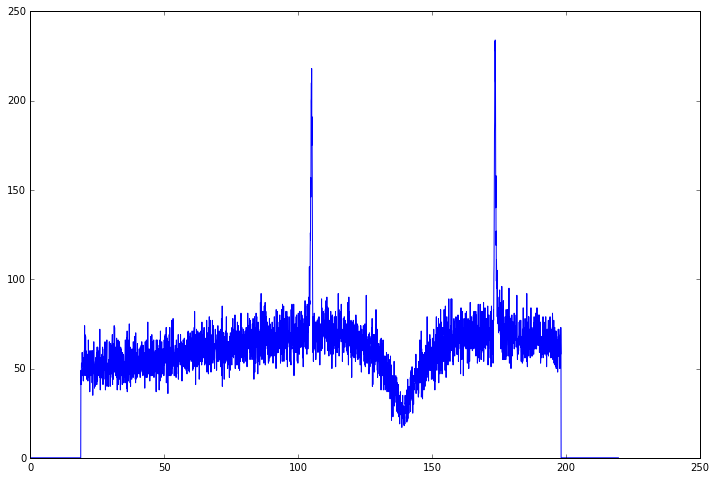

In [5]:
plt.plot(ab[:,0],ab[:,1])

In [7]:
(2960-2790)/2

170

In [8]:
55/28.6

1.923076923076923

In [11]:
import NV
from scipy.optimize import curve_fit
def T1Fit(t,I_inf,C_m,T_m,C_1,T_1):
         return I_inf * (1 - C_m*np.exp(-t/T_m) + C_1*np.exp(-t/T_1))


[  1.42855708e+02   2.59041893e-01   4.24378322e+03  -8.91126472e-01
   3.29727579e+02]


C:\Users\Ouyang Group\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in exp


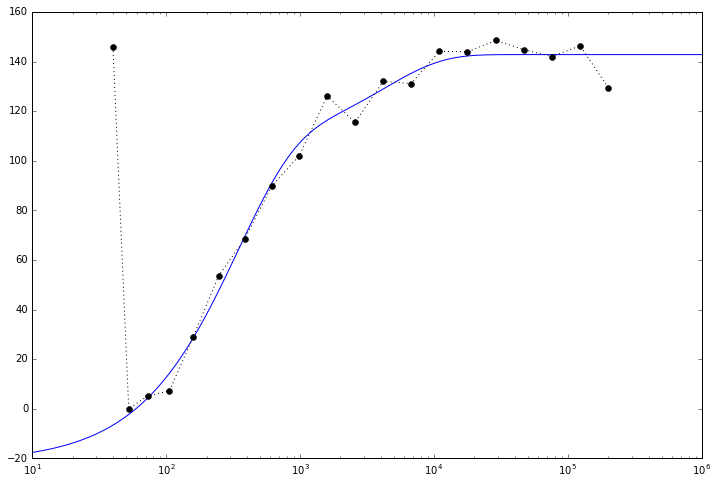

In [14]:
time,T0 = NV.EPR(r'C:\Users\Ouyang Group\Documents\Data\12-2-16\mnp 8-4 on cpw 1 mw 650lp scan 7 spcx=156 y=21 B0V T1 x155 y42 T1 7200 sec *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\12-2-16\mnp 8-4 on cpw 1 mw 650lp scan 7 spcx=156 y=21 B0V T1 x155 y42 T1 7200 sec  Pulse Seq')
time = time+20
T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

C:\Users\Ouyang Group\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in exp


[  8.30182319e+01   6.42498474e-01   1.21112253e+02  -6.19972033e-01
   4.85336792e+03]


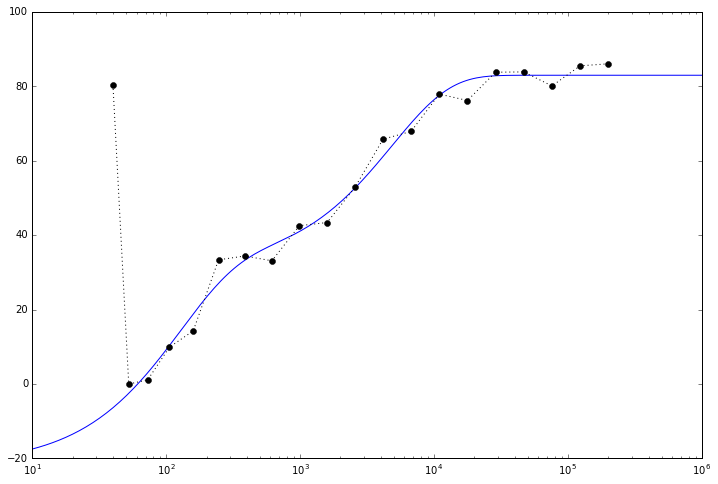

In [15]:
time,T0 = NV.EPR(r'C:\Users\Ouyang Group\Documents\Data\12-2-16\MNP 8-4 on CPW 0.5mW 650LP scan 10 B0V T1  x115 y101 T1 7200 sec *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\12-2-16\MNP 8-4 on CPW 0.5mW 650LP scan 10 B0V T1  x115 y101 T1 7200 sec  Pulse Seq')
time = time+20
T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

[  1.25244280e+02   1.57214094e-01   1.72014702e+04  -8.46757175e-01
   3.23017877e+02]


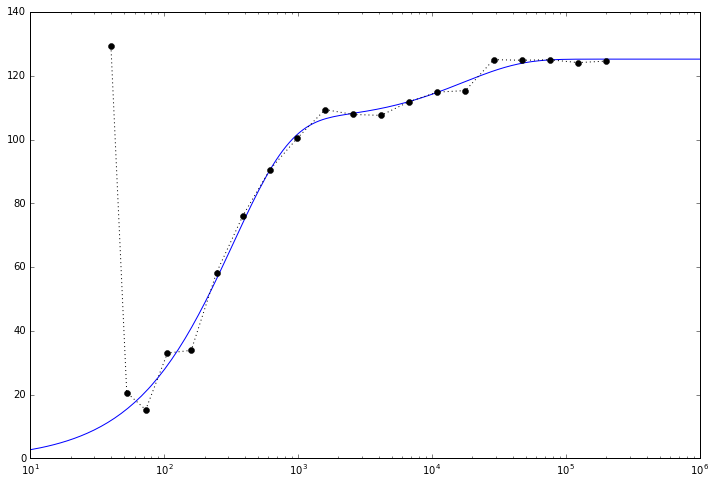

In [32]:
time,T0 = NV.EPR(r'C:\Users\Ouyang Group\Documents\Data\12-2-16\MNP 8-4 on CPW 0.5mW 650LP scan 10 B0V T1  x105 y70 T1 7200 sec *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\12-2-16\MNP 8-4 on CPW 0.5mW 650LP scan 10 B0V T1  x105 y70 T1 7200 sec  Pulse Seq')
time = time+20
T0 = T0# - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,200))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

[ 661.15806012   17.74488461  185.802799     17.55474575  184.46588875]


C:\Users\Ouyang Group\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in exp


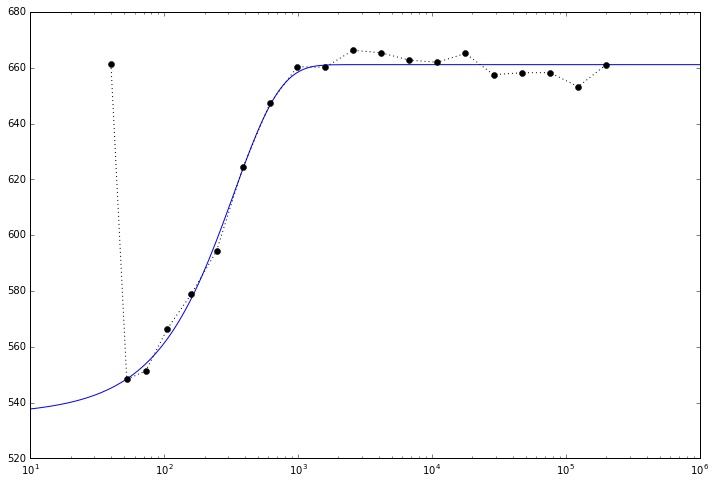

In [29]:
time,T0 = NV.EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\12-2-16\MNP 8-4 on CPW 0.5mW 650LP scan 10 B0V T1  x107 y55 T1 7200 sec *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\12-2-16\MNP 8-4 on CPW 0.5mW 650LP scan 10 B0V T1  x107 y55 T1 7200 sec  Pulse Seq')
time = time+20
T0 = T0 #- np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

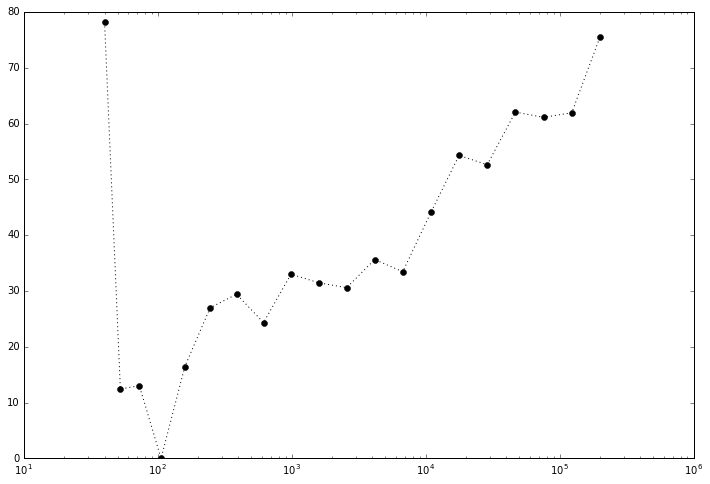

In [22]:
time,T0 = NV.EPR(r'C:\Users\Ouyang Group\Documents\Data\12-2-16\MNP 8-4 on CPW 0.5mW 650LP scan 10 B0V T1  x3 y91 T1 7200 sec *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\12-2-16\MNP 8-4 on CPW 0.5mW 650LP scan 10 B0V T1  x3 y91 T1 7200 sec  Pulse Seq')
time = time+20
T0 = T0 - np.min(T0)
#opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
#plt.semilogx(t,T1Fit(t,*opt0),'b-')
#print opt0
plt.semilogx(time,T0,'ko:')

C:\Users\Ouyang Group\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in exp
C:\Users\Ouyang Group\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in add


[  6.99342824e+01   3.70430593e-01   2.17348808e+01  -1.87885468e-01
   4.22590420e+02]


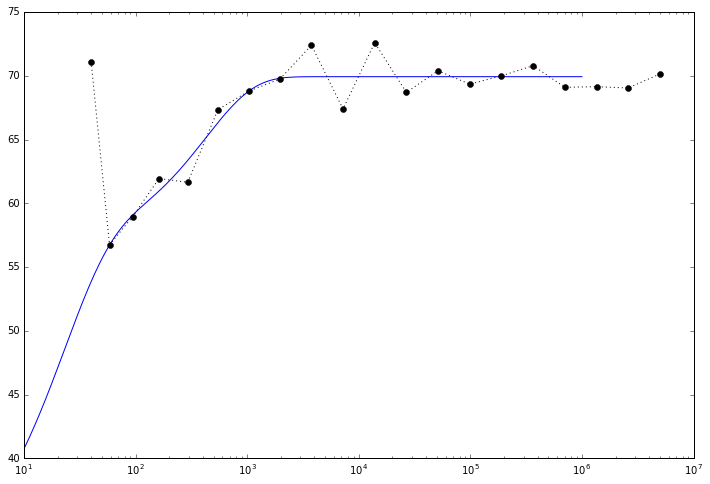

In [35]:
time,T0 = NV.EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\12-6-16\MNP 8-4 2mW scan 2 x106 y58 T1 *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\12-6-16\MNP 8-4 2mW scan 2 x106 y58 T1 Pulse Seq.txt')
time = time+20
T0 = T0 #- np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')